In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('/content/autos.csv', sep=';') # sep=';'
df.head()

,Millas_Por_Galon,Cilindros,Pais_Origen,Peso_En_Libras,Desplazamiento,Aceleracion,Nombre,Anyo,Caballo_De_Fuerza
0,18.0,8,USA,3504,307.0,12.0,chevrolet chevelle malibu,1/01/1970,130.0
1,15.0,8,USA,3693,350.0,11.5,buick skylark 320,1/01/1970,165.0
2,18.0,8,USA,3436,318.0,11.0,plymouth satellite,1/01/1970,150.0
3,16.0,8,USA,3433,304.0,12.0,amc rebel sst,1/01/1970,150.0
4,17.0,8,USA,3449,302.0,10.5,ford torino,1/01/1970,140.0


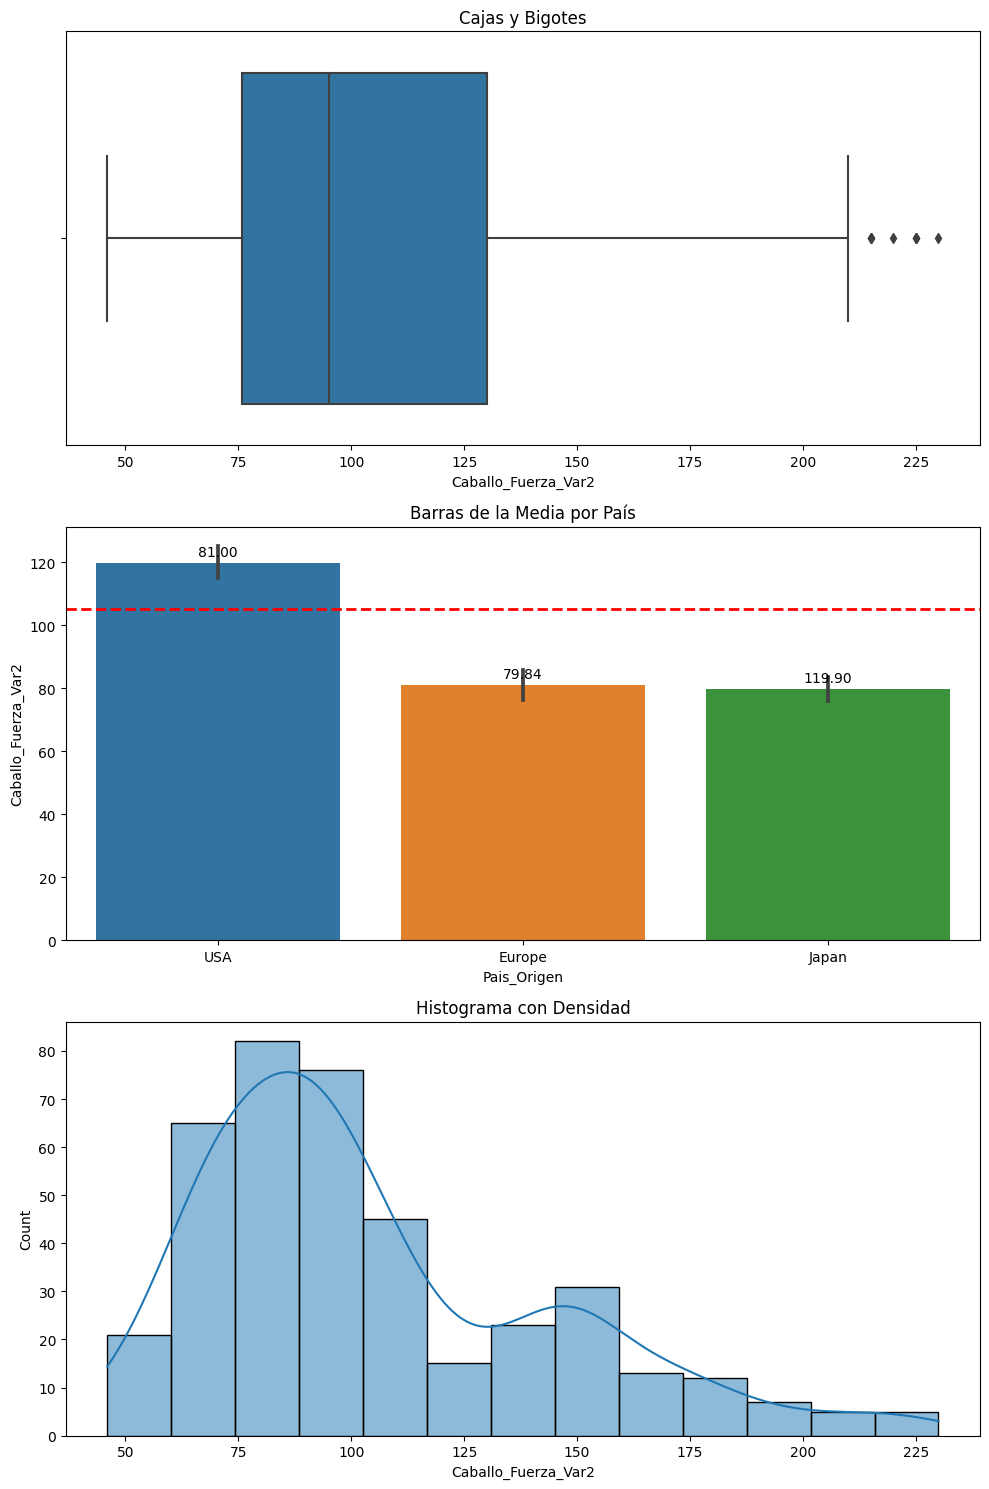

In [4]:
# Cambiar los nombres de las columnas
df.rename(columns={'Caballo_De_Fuerza': 'Caballo_Fuerza_Var2'}, inplace=True)

def visualizar_graficos(dataframe, columna_categoria, columna_paises):
    # Crear subplots
    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

    # Gráfico de cajas y bigotes

    sns.boxplot(x=dataframe[columna_categoria], ax=axes[0])
    axes[0].set_title('Cajas y Bigotes')

    # Gráfico de barras de la media por país
    sns.barplot(x=dataframe[columna_paises], y=dataframe[columna_categoria], ax=axes[1])
    axes[1].axhline(dataframe[columna_categoria].mean(), color='red', linestyle='dashed', linewidth=2)
    axes[1].set_title('Barras de la Media por País')

    # Etiquetas de los promedios en las barras
    for bar, label in zip(axes[1].patches, dataframe.groupby(columna_paises)[columna_categoria].mean()):
        axes[1].annotate(f'{label:.2f}', (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                         ha='center', va='center', size=10, color='black', xytext=(0, 8),
                         textcoords='offset points')

    # Histograma con densidad
    sns.histplot(dataframe[columna_categoria], kde=True, ax=axes[2])
    axes[2].set_title('Histograma con Densidad')

    # Ajustar diseño y mostrar gráficos
    plt.tight_layout()
    plt.show()

# Llamada a la función con tu DataFrame y las columnas de interés
visualizar_graficos(df, 'Caballo_Fuerza_Var2', 'Pais_Origen')